<a href="https://colab.research.google.com/github/fathimajafir/car-price-prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import math

In [ ]:
df=pd.read_csv('/content/CarPrice_project (1).csv')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


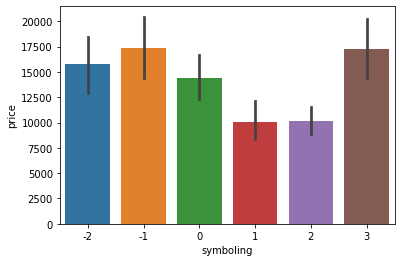

In [ ]:
sns.barplot(df['symboling'],df['price'])


In [ ]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

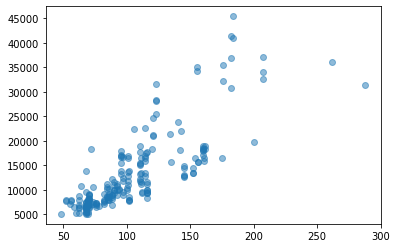

In [ ]:
plt.scatter(df['horsepower'],df['price'],alpha=0.5)

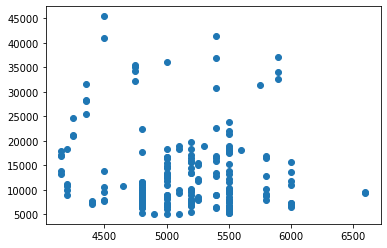

In [ ]:
plt.scatter(df['peakrpm'],df['price'])

In [ ]:
def extract(string):
  x=string.split(' ')
  return x[0]

In [ ]:
df['CarName'].apply(extract)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [ ]:
def new(string):
  x=string.split('-')
  return x[0]

In [ ]:
df['CarName']=df['CarName'].apply(new).apply(extract)

In [ ]:
df['CarName'].value_counts()

toyota        31
nissan        17
mazda         15
mitsubishi    13
honda         13
subaru        12
peugeot       11
volvo         11
dodge          9
volkswagen     9
bmw            8
buick          8
plymouth       7
audi           7
saab           6
porsche        4
isuzu          4
jaguar         3
alfa           3
chevrolet      3
vw             2
renault        2
maxda          2
porcshce       1
mercury        1
vokswagen      1
toyouta        1
Nissan         1
Name: CarName, dtype: int64

In [ ]:
obj_df=df.select_dtypes(include=['object']).copy()

In [ ]:
obj_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [ ]:
obj_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [ ]:
clean_up_nums={"doornumber":{"four":4,"two":2},"cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [ ]:
obj_df=obj_df.replace(clean_up_nums)

In [ ]:
obj_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [ ]:
obj_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [ ]:
obj_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [ ]:
obj_df['drivewheel']=pd.get_dummies(obj_df['drivewheel'])

In [ ]:
obj_df=pd.get_dummies(obj_df,columns=['drivewheel','carbody'],prefix=['body','drive'])

In [ ]:
obj_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [ ]:
obj_df['ohc_codes']=np.where(obj_df['enginetype'].str.contains('ohc'),0,1)

In [ ]:
obj_df[['ohc_codes','enginetype','CarName']].head()

,ohc_codes,enginetype,CarName
0,0,dohc,alfa
1,0,dohc,alfa
2,0,ohcv,alfa
3,0,ohc,audi
4,0,ohc,audi


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
or_en=OrdinalEncoder()

In [ ]:
obj_df['make_code']=or_en.fit_transform(obj_df[['CarName']])

In [ ]:
obj_df[['make_code','CarName']].head(11)

,make_code,CarName
0,1.0,alfa
1,1.0,alfa
2,1.0,alfa
3,2.0,audi
4,2.0,audi
5,2.0,audi
6,2.0,audi
7,2.0,audi
8,2.0,audi
9,2.0,audi


In [ ]:
obj_df.head()

,CarName,fueltype,aspiration,doornumber,enginelocation,enginetype,cylindernumber,fuelsystem,body_0,body_1,drive_convertible,drive_hardtop,drive_hatchback,drive_sedan,drive_wagon,ohc_codes,make_code
0,alfa,gas,std,2,front,dohc,4,mpfi,1,0,1,0,0,0,0,0,1.0
1,alfa,gas,std,2,front,dohc,4,mpfi,1,0,1,0,0,0,0,0,1.0
2,alfa,gas,std,2,front,ohcv,6,mpfi,1,0,0,0,1,0,0,0,1.0
3,audi,gas,std,4,front,ohc,4,mpfi,1,0,0,0,0,1,0,0,2.0
4,audi,gas,std,4,front,ohc,5,mpfi,0,1,0,0,0,1,0,0,2.0


In [ ]:
obj_df['fueltype']=pd.get_dummies(obj_df['fueltype'])

In [ ]:
obj_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
obj_df['aspiration']=pd.get_dummies(obj_df['aspiration'])

In [ ]:
obj_df.head()

,CarName,fueltype,aspiration,doornumber,enginelocation,enginetype,cylindernumber,fuelsystem,body_0,body_1,drive_convertible,drive_hardtop,drive_hatchback,drive_sedan,drive_wagon,ohc_codes,make_code
0,alfa,0,1,2,front,dohc,4,mpfi,1,0,1,0,0,0,0,0,1.0
1,alfa,0,1,2,front,dohc,4,mpfi,1,0,1,0,0,0,0,0,1.0
2,alfa,0,1,2,front,ohcv,6,mpfi,1,0,0,0,1,0,0,0,1.0
3,audi,0,1,4,front,ohc,4,mpfi,1,0,0,0,0,1,0,0,2.0
4,audi,0,1,4,front,ohc,5,mpfi,0,1,0,0,0,1,0,0,2.0


In [ ]:
obj_df.drop('CarName',axis=1,inplace=True)

In [ ]:
obj_df.head()

,fueltype,aspiration,doornumber,enginelocation,enginetype,cylindernumber,fuelsystem,body_0,body_1,drive_convertible,drive_hardtop,drive_hatchback,drive_sedan,drive_wagon,ohc_codes,make_code
0,0,1,2,front,dohc,4,mpfi,1,0,1,0,0,0,0,0,1.0
1,0,1,2,front,dohc,4,mpfi,1,0,1,0,0,0,0,0,1.0
2,0,1,2,front,ohcv,6,mpfi,1,0,0,0,1,0,0,0,1.0
3,0,1,4,front,ohc,4,mpfi,1,0,0,0,0,1,0,0,2.0
4,0,1,4,front,ohc,5,mpfi,0,1,0,0,0,1,0,0,2.0


In [ ]:
obj_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [ ]:
obj_df['fuelsystem']=or_en.fit_transform(obj_df[['fuelsystem']])

In [ ]:
obj_df.head()

,fueltype,aspiration,doornumber,enginelocation,enginetype,cylindernumber,fuelsystem,body_0,body_1,drive_convertible,drive_hardtop,drive_hatchback,drive_sedan,drive_wagon,ohc_codes,make_code
0,0,1,2,front,dohc,4,5.0,1,0,1,0,0,0,0,0,1.0
1,0,1,2,front,dohc,4,5.0,1,0,1,0,0,0,0,0,1.0
2,0,1,2,front,ohcv,6,5.0,1,0,0,0,1,0,0,0,1.0
3,0,1,4,front,ohc,4,5.0,1,0,0,0,0,1,0,0,2.0
4,0,1,4,front,ohc,5,5.0,0,1,0,0,0,1,0,0,2.0


In [ ]:
obj_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [ ]:
obj_df['enginelocation']=pd.get_dummies(obj_df['enginelocation'])

In [ ]:
obj_df.head()

,fueltype,aspiration,doornumber,enginelocation,enginetype,cylindernumber,fuelsystem,body_0,body_1,drive_convertible,drive_hardtop,drive_hatchback,drive_sedan,drive_wagon,ohc_codes,make_code
0,0,1,2,1,dohc,4,5.0,1,0,1,0,0,0,0,0,1.0
1,0,1,2,1,dohc,4,5.0,1,0,1,0,0,0,0,0,1.0
2,0,1,2,1,ohcv,6,5.0,1,0,0,0,1,0,0,0,1.0
3,0,1,4,1,ohc,4,5.0,1,0,0,0,0,1,0,0,2.0
4,0,1,4,1,ohc,5,5.0,0,1,0,0,0,1,0,0,2.0


In [ ]:
obj_df.drop('enginetype',axis=1,inplace=True)

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.drop(['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem'],axis=1,inplace=True)

In [ ]:
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.drop('cylindernumber',axis=1,inplace=True)

In [ ]:
df_new=pd.concat([df,obj_df], axis=1, join='inner')


In [ ]:
df_new.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype,aspiration,doornumber,enginelocation,cylindernumber,fuelsystem,body_0,body_1,drive_convertible,drive_hardtop,drive_hatchback,drive_sedan,drive_wagon,ohc_codes,make_code
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,2,1,4,5.0,1,0,1,0,0,0,0,0,1.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,2,1,4,5.0,1,0,1,0,0,0,0,0,1.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,2,1,6,5.0,1,0,0,0,1,0,0,0,1.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,4,1,4,5.0,1,0,0,0,0,1,0,0,2.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,4,1,5,5.0,0,1,0,0,0,1,0,0,2.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar=MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
deped_variabl=df['price']

In [ ]:
inde_variable=df.drop('price',axis=1)

In [ ]:
X=inde_variable
y=deped_variabl

In [ ]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)